In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def show_image(img):
    plt.imshow(img,cmap='gray')
    plt.show()

In [49]:
def image_segmentation(hsv_img):
    
    # Taking slices of the individual HSV components
    h_slice = hsv_img[:,:,0]
    s_slice = hsv_img[:,:,1]
    v_slice = hsv_img[:,:,2]

    # Taking Image Gradient using Sobel operator in x axis
    sobel_x = cv2.Sobel(v_slice, cv2.CV_64F, 1, 0)
    sobel_x = np.absolute(sobel_x)
    sobel_x = np.uint8(255*sobel_x/np.max(sobel_x))

    # Binarisation of Image gradient
    sobel_x_binary = np.zeros_like(sobel_x)
    sobel_x_binary[(sobel_x >= 15) & (sobel_x <= 255)] = 1

    # Binarisation of Saturation component of image
    s_slice_binary = np.zeros_like(s_slice)
    s_slice_binary[(s_slice >= 100) & (s_slice <= 255)] = 1

    # Combining gradient and saturation binary images using OR
    combined_binary = np.zeros_like(sobel_x_binary)
    combined_binary[(s_slice_binary == 1) | (sobel_x_binary == 1)] = 1

    return combined_binary

In [52]:
# Input: Image in BGR format
def find_lanes(img):

    # Converting BGR image to HSV colorspace
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    
    # Performing image segmentation to accentuate lanes
    img_seg = image_segmentation(hsv_img)
    show_image(img=img_seg)
    

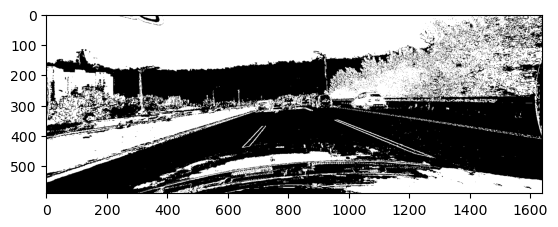

In [53]:
image = cv2.imread('images/00195.jpg')
find_lanes(image)